In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lien vers la page github
https://github.com/YoannForest/SAE_601.git

# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [1]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [4]:
df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [5]:
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\Users\\r.bennetayeb\\Desktop\\these\\Enseignement\\SAE_projet\\Data\\ds_salaries.csv'

In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [7]:
#données manquantes 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

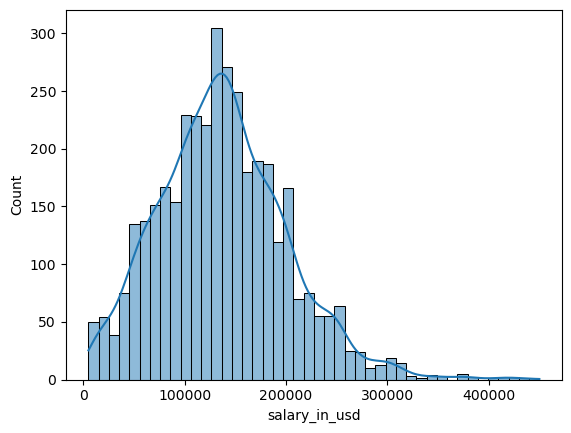

In [9]:
# Distribution des salaires en USD
sns.histplot(data=df, x="salary_in_usd", kde=True)
plt.show()

In [13]:
# liste des pays concerné par l'étude 
list(pd.unique(df["company_location"]))

['ES',
 'US',
 'CA',
 'DE',
 'GB',
 'NG',
 'IN',
 'HK',
 'NL',
 'CH',
 'CF',
 'FR',
 'FI',
 'UA',
 'IE',
 'IL',
 'GH',
 'CO',
 'SG',
 'AU',
 'SE',
 'SI',
 'MX',
 'BR',
 'PT',
 'RU',
 'TH',
 'HR',
 'VN',
 'EE',
 'AM',
 'BA',
 'KE',
 'GR',
 'MK',
 'LV',
 'RO',
 'PK',
 'IT',
 'MA',
 'PL',
 'AL',
 'AR',
 'LT',
 'AS',
 'CR',
 'IR',
 'BS',
 'HU',
 'AT',
 'SK',
 'CZ',
 'TR',
 'PR',
 'DK',
 'BO',
 'PH',
 'BE',
 'ID',
 'EG',
 'AE',
 'LU',
 'MY',
 'HN',
 'JP',
 'DZ',
 'IQ',
 'CN',
 'NZ',
 'CL',
 'MD',
 'MT']

In [22]:
#Salaire moyen par rôle
round(df.groupby(["job_title"])[["salary_in_usd"]].mean(),2)

# Salaire moyen par pays
round(df.groupby(["company_location"])[["salary_in_usd"]].mean(),2)

# Salaires moyens par niveau d'expérience
round(df.groupby(["experience_level"])[["salary_in_usd"]].mean(),2)


,salary_in_usd
experience_level,
EN,78546.28
EX,194930.93
MI,104525.94
SE,153051.07


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [26]:
# Filtrer les salaires pour un pays donné (ex : US)
df.query("employee_residence == 'US'")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [30]:
# Top 5 des entreprises qui paient le plus
round(df.groupby(["company_location"])[["salary_in_usd"]].mean(),2).nlargest(5,"salary_in_usd")

,salary_in_usd
company_location,
IL,271446.50
PR,167500.00
US,151822.01
RU,140333.33
CA,131917.69


In [40]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
round(df.groupby(["job_title"])[["salary_in_usd"]].mean(),2).query("salary_in_usd > 100000 ")
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
df.query("remote_ratio == 100 ")["company_location"].unique()

array(['ES', 'US', 'CA', 'GB', 'NG', 'DE', 'NL', 'CH', 'IN', 'CF', 'FI',
       'IE', 'SG', 'SI', 'MX', 'BR', 'PT', 'FR', 'SE', 'KE', 'PK', 'AU',
       'PL', 'CO', 'AR', 'CR', 'IR', 'HU', 'SK', 'CZ', 'PR', 'AS', 'TH',
       'GR', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'EE', 'UA', 'DK',
       'TR', 'CL', 'JP', 'HR', 'IL'], dtype=object)

In [47]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
print(df.query("remote_ratio == 100 ")[["salary_in_usd"]].mean())
# Comparer salaires moyens pour deux catégories
print(df.query("job_title == 'Applied Scientist'")[["salary_in_usd"]].mean())
print(df.query("job_title == 'Data Scientist'")[["salary_in_usd"]].mean())

salary_in_usd    136481.45283
dtype: float64
salary_in_usd    190264.482759
dtype: float64
salary_in_usd    140869.765476
dtype: float64


In [54]:
# Ajouter une colonne pour les fourchettes de salaires
df['fork']=pd.cut(df["salary_in_usd"],[0,50000,100000,150000,np.inf],labels=["<50k","50k-100k","100k-150k",">150k"])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,fork
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50k-100k
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,<50k
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,<50k
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,>150k
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,>150k
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,>150k
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,100k-150k
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,50k-100k


In [58]:
# Analyse des corrélations
# Relation entre télétravail et salaire
df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


In [63]:
# Salaire moyen par taille d'entreprise
round(df.groupby(["company_size"])[["salary_in_usd"]].mean(),2)

,salary_in_usd
company_size,
L,118300.98
M,143130.55
S,78226.68


In [67]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level',
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='mean'
)
print("Tableau croisé des salaires :", pivot_table)

Tableau croisé des salaires : remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
